In [1]:
# convert mseeds file to SAC files and write station and event headers
from obspy.core.event import read_events # obspy event class has a method to read events from a catalogue
from obspy.core.event import Catalog, Event, Origin, Magnitude
from obspy import read, Stream, UTCDateTime
from obspy.io.sac import SACTrace, header
from obspy import read, read_inventory
from obspy import Trace
from obspy.signal.invsim import paz_to_freq_resp
from obspy.io.sac.sacpz import attach_paz
from glob import glob
import obspy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy.geodetics import gps2dist_azimuth, kilometers2degrees
plt.rcParams['figure.figsize'] = 12, 6
stn='TPUB'
plt.figure()
for comp in ["Z", "N", "E"]:
    paz="/home/seismograms/TWseismograms/PZ/TPUB/TPUB.HH%s.IES_BATS.01.20090219_99999999.pz"%(comp)
    tr=Trace()
    attach_paz(tr,paz, tovel=True, torad=True)
    poles=tr.stats.paz['poles']
    zeros=tr.stats.paz['zeros']
    scale_fac=tr.stats.paz['sensitivity'] * tr.stats.paz['gain']
    print(poles, scale_fac)
    h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.01, 131072, freq=True)
    plt.subplot(121)
    plt.loglog(f, abs(h))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    phase = 2 * np.pi + np.unwrap(np.angle(h))
    plt.semilogx(f, phase)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radian]')
# ticks and tick labels at multiples of pi
    plt.yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi, 5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi], 
            ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$', r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$'])
    plt.ylim(-0.2, 4 * np.pi + 0.2)
# title, centered above both subplots
    plt.suptitle("Velocity Response of station " + stn + "HH"+comp)
# make more room in between subplots for the ylabel of right plot
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    png=stn+".HH"+comp+".disp_response_sacpz.png"
    plt.savefig(png)

    
stla=23.3005
stlo=120.6296
stel=370.0


[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


<Figure size 1200x600 with 2 Axes>

[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


<Figure size 1200x600 with 2 Axes>

[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


<Figure size 1200x600 with 2 Axes>

['DEFAULT_PRECISION', '_UTCDateTime__ns', '_UTCDateTime__precision', '__abs__', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__float__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__unicode__', '__weakref__', '_from_datetime', '_from_iso8601_string', '_from_timestamp', '_get_date', '_get_datetime', '_get_day', '_get_hour', '_get_hours_after_midnight', '_get_julday', '_get_microsecond', '_get_minute', '_get_month', '_get_ns', '_get_precision', '_get_second', '_get_time', '_get_timestamp', '_get_weekday', '_get_year', '_handle_overflow', '_has_warned', '_initialized', '_ns', '_operate', '_repr_pretty_', '_set', '_set_day', '_set_hour', '_set_julday', '_set_microsecond', '_set_minute', '_set_month', '_set_ns', '_set_precision', 

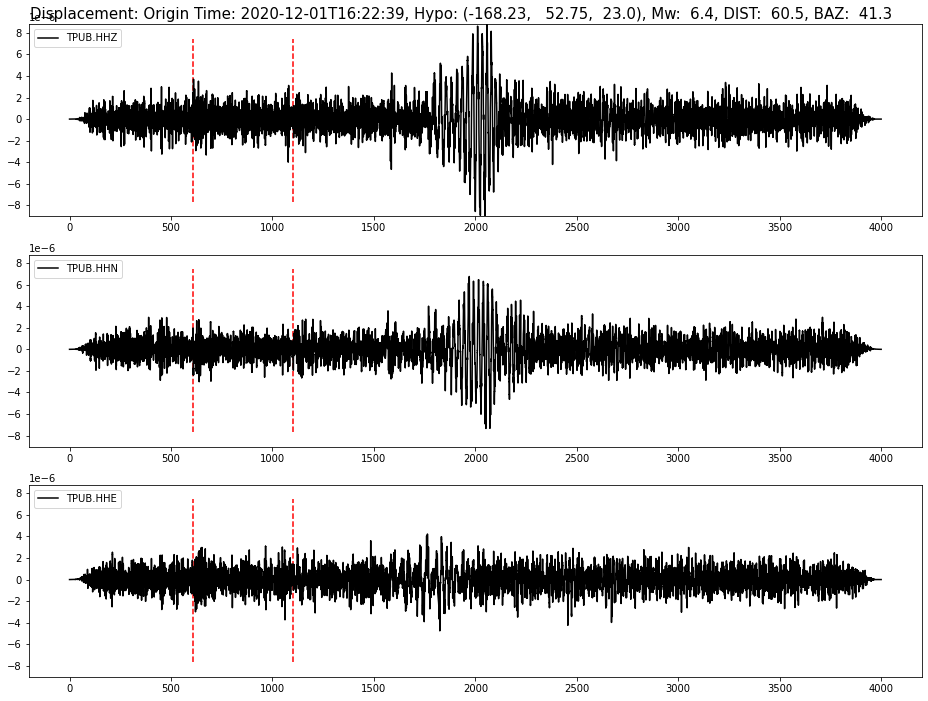

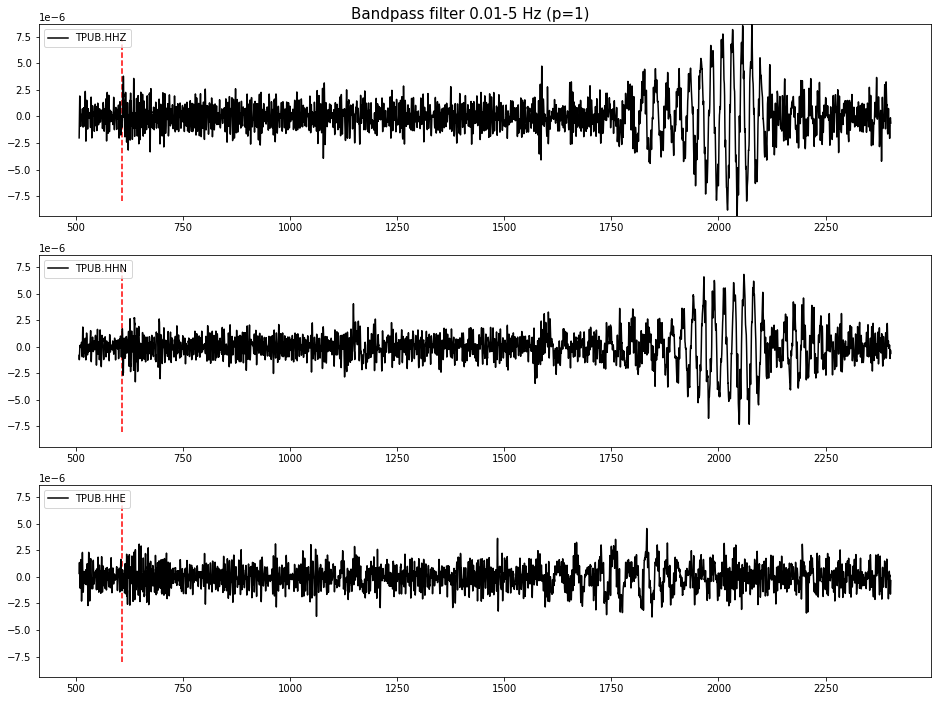

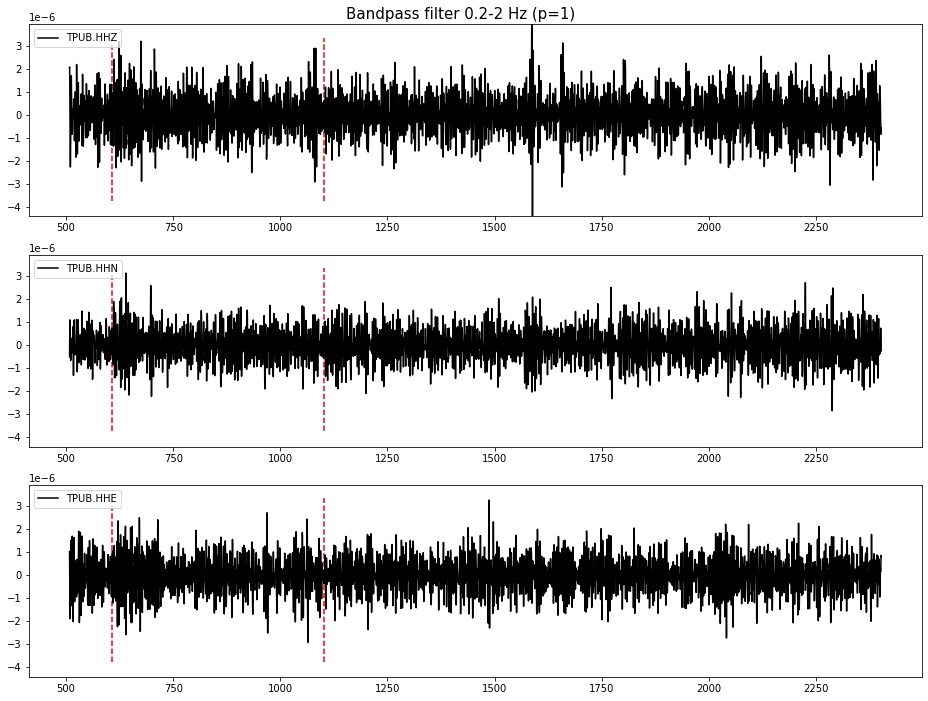

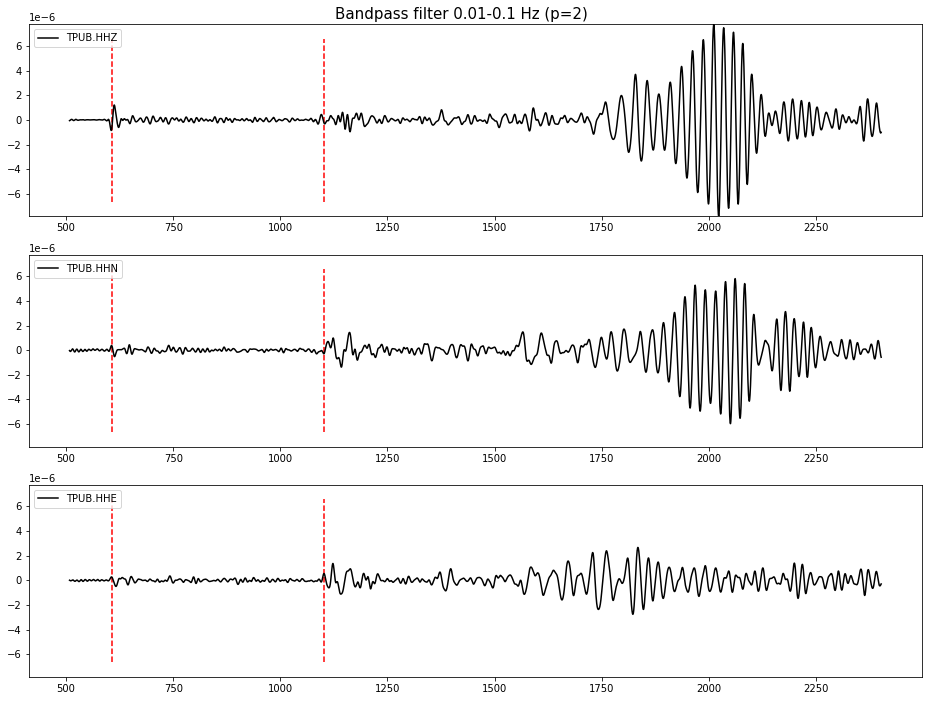

In [2]:
from obspy.geodetics import gps2dist_azimuth, kilometers2degrees
from obspy.clients.iris import Client
from obspy.taup import TauPyModel, plot_travel_times
from matplotlib.dates import date2num
from obspy.signal import filter

msfile = "/home/seismograms/TWseismograms/BATS/TPUB/2020/TPUB.TW..HHZ.2020.336"
plt.rcParams['figure.figsize'] = 16, 12

st=Stream()
tr=Trace()
starttime=UTCDateTime("2020-12-01T16:22:39.908000Z")
print(dir(starttime))
endtime=starttime+4000
evla=52.7516
evlo=-168.2307
evdp=23.0
sta="TPUB"
pre_filt = (0.005, 0.006, 45.0, 55.0)
for comp in ["Z", "N", "E"]:
    msfile="/home/seismograms/TWseismograms/BATS/TPUB/2020/TPUB.TW..HH%s.2020.336"%(comp)
    paz="/home/seismograms/TWseismograms/PZ/TPUB/TPUB.HH%s.IES_BATS.01.20090219_99999999.pz"%(comp)
    ms=read(msfile)
    attach_paz(tr, paz, tovel=False, torad=True)
    poles=tr.stats.paz['poles']
    zeros=tr.stats.paz['zeros']
    ms.trim(starttime=starttime,endtime=endtime)
    ms.detrend("linear")
    ms.taper(max_percentage=0.05)
    ms.simulate(paz_remove=tr.stats.paz, remove_sensitivity=True, pre_filt=pre_filt, water_level=0.)
    st+=ms.copy()
#st.plot()
# calucluate gcarc and baz
client = Client()
result=client.distaz(stalat=stla, stalon=stlo, evtlat=evla, evtlon=evlo)
gcarc = float(result['distance'])
baz = float(result['backazimuth'])
model = TauPyModel(model="ak135")
arrivals = model.get_travel_times(source_depth_in_km=evdp,
                                  distance_in_degree=gcarc, phase_list=["P", "S"])
arr=arrivals[0]
tp=arrivals[0].time
ts=arrivals[1].time
tb=starttime
to=0.
otime=np.array([starttime],dtype='datetime64[s]')
hypo="{0:7.2f}, {1:7.2f}, {2:5.1f}".format(evlo,evla,evdp)
       
rst=st.copy()

ymin=min(min(rst[0].data),min(rst[1].data),min(rst[2].data))
ymax=max(max(rst[0].data),max(rst[1].data),min(rst[2].data))
rst.rotate(method='NE->RT', back_azimuth=baz)
rst[1].stats.channel = rst[1].stats.channel[:-1] + 'R'
rst[2].stats.channel = rst[2].stats.channel[:-1] + 'T'
        
#
figname='{}.{}.raw.png'.format(sta,otime[0])
header={'kstnm': 'TPUB', 'kcmpnm': 'BHZ', 'stla': stla, 'stlo': stlo,
          'evla': evla, 'evlo': evlo, 'evdp': evdp, 'nzyear': 2020,
          'nzjday': starttime.julday, 'nzhour': starttime.hour, 'nzmin': starttime.minute, 'nzsec': starttime.second,
          'nzmsec': int(starttime.microsecond*0.001), 'delta': 0.02, 't1': tp, 't2': ts}
print(header)
sac=SACTrace(data=st[0].data, **header)
sac.write('TPUB.BHZ.sac')
header['kcmpnm']='BHN'
sac=SACTrace(data=st[1].data, **header)
sac.write('TPUB.BHN.sac')
header['kcmpnm']='BHE'
sac=SACTrace(data=st[2].data, **header)
sac.write('TPUB.BHE.sac')

fig, axs = plt.subplots(nrows=3)
for ax, tr_zne, tr_zrt in zip(axs, st, rst):
    ax.plot(tr_zne.times(), tr_zne.data, color='k', linestyle='-',
    label="{}.{}".format(tr_zne.stats.station,tr_zne.stats.channel))
#   ax.plot(tr_zrt.times(), tr_zrt.data, color='k', linestyle='-',
#   label="{}.{}".format(tr_zrt.stats.station,tr_zrt.stats.channel))
    ax.set_ylim([ymin,ymax])            
    ax.vlines(x=[tp,ts],ymin=ymin*0.85,ymax=ymax*0.85,color='r',linestyle='--')
    ax.legend(loc='upper left')
mag=6.4
fig.suptitle('Displacement: Origin Time: {0:s}, Hypo: ({1:s}), Mw: {2:4.1f}, DIST: {3:5.1f}, BAZ: {4:5.1f}'.
             format(otime[0],hypo,mag,gcarc,baz), fontsize=15, x=0.5,y=0.9)
fig.savefig(figname)
        
tr=st.copy()
tr.detrend("linear")
tr.taper(max_percentage=0.05, type='hann')
fmin=0.01
fmax=5
tr.filter("bandpass", freqmin=fmin, freqmax=fmax, corners=4, zerophase=False)
rst=tr.copy()
starttime=tb+tp-100
endtime=tb+ts+1300
#endtime=starttime+150
rst.trim(starttime=starttime,endtime=endtime)
tr=rst.copy()
ymin=min(min(rst[0].data),min(rst[1].data),min(rst[2].data))
ymax=max(max(rst[0].data),max(rst[1].data),min(rst[2].data))      
rst.rotate(method='NE->RT', back_azimuth=baz)
rst[1].stats.channel = rst[1].stats.channel[:-1] + 'R'
rst[2].stats.channel = rst[2].stats.channel[:-1] + 'T'

#        tr.plot(starttime=to+tp-150,endtime=to+ts+600)
#        rst.trim(starttime=starttime,endtime=endtime)
        
figname='{}.{}.bp{}-{}hz.png'.format(sta,otime[0],fmin,fmax)
fig, axs = plt.subplots(nrows=3)     
for ax, tr_zne, tr_zrt in zip(axs, tr, rst):
    ax.plot(tr_zne.times()+to+tp-100, tr_zne.data, color='k', linestyle='-',
    label="{}.{}".format(tr_zne.stats.station,tr_zne.stats.channel))
#    ax.plot(tr_zrt.times()+to+tp-100, tr_zrt.data, color='b', linestyle=':',
#    abel="{}.{}".format(tr_zrt.stats.station,tr_zrt.stats.channel))
    ax.set_ylim([ymin,ymax])
    ax.vlines(x=[tp],ymin=ymin*0.85,ymax=ymax*0.85,color='r',linestyle='--')
    ax.legend(loc='upper left')

fig.suptitle('Bandpass filter {}-{} Hz (p=1)'.format(fmin,fmax), fontsize=15, x=0.5,y=0.9)
fig.savefig(figname)
        
tr_hbp=st.copy()
tr_hbp.detrend("linear").taper(max_percentage=0.05, type='hann')
fmax=2
fmin=0.2
tr_hbp.filter("bandpass", freqmin=fmin, freqmax=fmax, corners=4, zerophase=False)
rst=tr_hbp.copy()
rst.trim(starttime=starttime,endtime=endtime)
tr_hbp=rst.copy()
ymin=min(min(rst[0].data),min(rst[1].data),min(rst[2].data))
ymax=max(max(rst[0].data),max(rst[1].data),min(rst[2].data))       
rst.rotate(method='NE->RT', back_azimuth=baz)
rst[1].stats.channel = rst[1].stats.channel[:-1] + 'R'
rst[2].stats.channel = rst[2].stats.channel[:-1] + 'T'       
#        rst.trim(starttime=starttime,endtime=endtime)
        
figname='{}.{}.bp{}-{}hz.png'.format(sta,otime[0],fmin,fmax)
fig, axs = plt.subplots(nrows=3)    
for ax, tr_zne, tr_zrt in zip(axs, tr_hbp, rst):
    ax.plot(tr_zne.times()+to+tp-100, tr_zne.data, color='k', linestyle='-',
    label="{}.{}".format(tr_zne.stats.station,tr_zne.stats.channel))
#     ax.plot(tr_zrt.times()+to+tp-100, tr_zrt.data, color='b', linestyle=':',
#     label="{}.{}".format(tr_zrt.stats.station,tr_zrt.stats.channel))
    ax.set_ylim([ymin,ymax])
    ax.vlines(x=[tp,ts],ymin=ymin*0.85,ymax=ymax*0.85,color='r',linestyle='--')
    ax.legend(loc='upper left')
        
fig.suptitle('Bandpass filter {}-{} Hz (p=1)'.format(fmin,fmax), fontsize=15, x=0.5,y=0.9)
fig.savefig(figname)
        
tr_lbp=st.copy()     
tr_lbp.detrend("linear").taper(max_percentage=0.05, type='hann')
fmax=0.1
fmin=0.01
tr_lbp.filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True)
      
rst=tr_lbp.copy()
rst.trim(starttime=starttime,endtime=endtime)
tr_lbp=rst.copy()
ymin=min(min(rst[0].data),min(rst[1].data),min(rst[2].data))
ymax=max(max(rst[0].data),max(rst[1].data),min(rst[2].data))       
rst.rotate(method='NE->RT', back_azimuth=baz)
rst[1].stats.channel = rst[1].stats.channel[:-1] + 'R'
rst[2].stats.channel = rst[2].stats.channel[:-1] + 'T'

    
figname='{}.{}.bp{}-{}hz.png'.format(sta,otime[0],fmin,fmax)
fig, axs = plt.subplots(nrows=3)
 
for ax, tr_zne, tr_zrt in zip(axs, tr_lbp, rst):
    ax.plot(tr_zne.times()+to+tp-100, tr_zne.data, color='k', linestyle='-',
    label="{}.{}".format(tr_zne.stats.station,tr_zne.stats.channel))
#   ax.plot(tr_zrt.times()+to+tp-100, tr_zrt.data, color='b', linestyle=':',
#   label="{}.{}".format(tr_zrt.stats.station,tr_zrt.stats.channel))
    ax.set_ylim([ymin,ymax])
    ax.vlines(x=[tp,ts],ymin=ymin*0.85,ymax=ymax*0.85,color='r',linestyle='--')
    ax.legend(loc='upper left')
    
fig.suptitle('Bandpass filter {}-{} Hz (p=2)'.format(fmin,fmax), fontsize=15, x=0.5,y=0.9)
fig.savefig(figname)
        
#        fig.tight_layout()

#fig = plt.figure()
#plt.rcParams['figure.figsize'] = 16, 12
#st.plot(fig=fig, show=False)
#ax = fig.axes[0]
#ax.axvline(date2num(tp.datetime), lw=1.5)
#ax.axvline(date2num(ts.datetime), lw=1.5)


plt.show()

In [18]:
# convert mseeds file to SAC files and write station and event headers
from obspy.core.event import read_events # obspy event class has a method to read events from a catalogue
from obspy.core.event import Catalog, Event, Origin, Magnitude
from obspy import read, Stream, UTCDateTime
from obspy.io.sac import SACTrace, header
from obspy import read, read_inventory
from obspy import Trace
from obspy.signal.invsim import paz_to_freq_resp
from obspy.io.sac.sacpz import attach_paz
from glob import glob
import obspy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy.geodetics import gps2dist_azimuth, kilometers2degrees
plt.rcParams['figure.figsize'] = 12, 6
stn="MASB"
stafile="/home/seismograms/TWseismograms/Continuous/nsta24.dat"
with open(stafile) as f:
    contents=f.readlines()
    contents = [item.strip("\n") for item in contents]
    print(contents[0])
#    if contents[0] == stn:
#        print(contents)
#        stla=enumerate(contents[2])
#        stlo=enumerate(contents[1])
#        stel=enumerate(contents[3])
        
print(stlo,stla,stel)            
plt.figure()
for comp in ["Z", "N", "E"]:
    paz=glob("/home/seismograms/TWseismograms/PZ/%s/%s.HH%s.IES_BATS.*.*_99999999.pz"%(stn,stn,comp))
    print(paz)
    tr=Trace()
    attach_paz(tr,paz, tovel=True, torad=True)
    poles=tr.stats.paz['poles']
    zeros=tr.stats.paz['zeros']
    scale_fac=tr.stats.paz['sensitivity'] * tr.stats.paz['gain']
    print(poles, scale_fac)
    h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.01, 131072, freq=True)
    plt.subplot(121)
    plt.loglog(f, abs(h))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    phase = 2 * np.pi + np.unwrap(np.angle(h))
    plt.semilogx(f, phase)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radian]')
# ticks and tick labels at multiples of pi
    plt.yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi, 5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi], 
            ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$', r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$'])
    plt.ylim(-0.2, 4 * np.pi + 0.2)
# title, centered above both subplots
    plt.suptitle("Velocity Response of station " + stn + "HH"+comp)
# make more room in between subplots for the ylabel of right plot
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    png=stn+".HH"+comp+".disp_response_sacpz.png"
    plt.savefig(png)



sta  Lon      Lat      Z 
120.6296 23.3005 370.0
['/home/seismograms/TWseismograms/PZ/MASB/MASB.HHZ.IES_BATS.01.20100325_99999999.pz']


AttributeError: 'list' object has no attribute 'readline'

<Figure size 864x432 with 0 Axes>

/home/userlibs/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


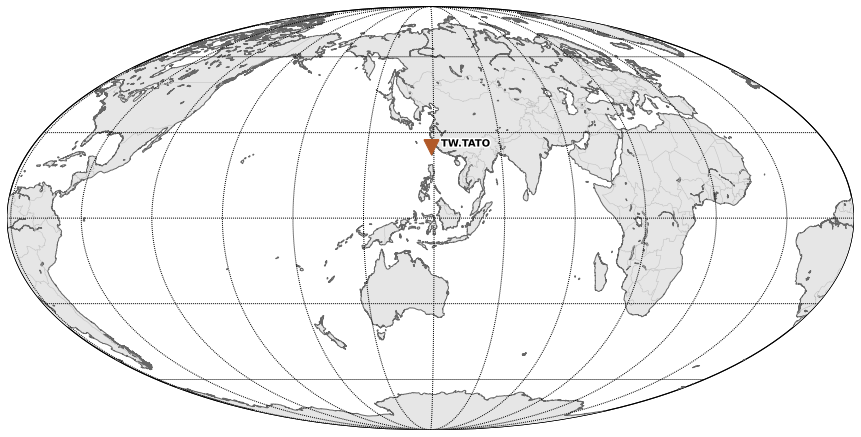

ValueError: check_channel: Illegal RESP format

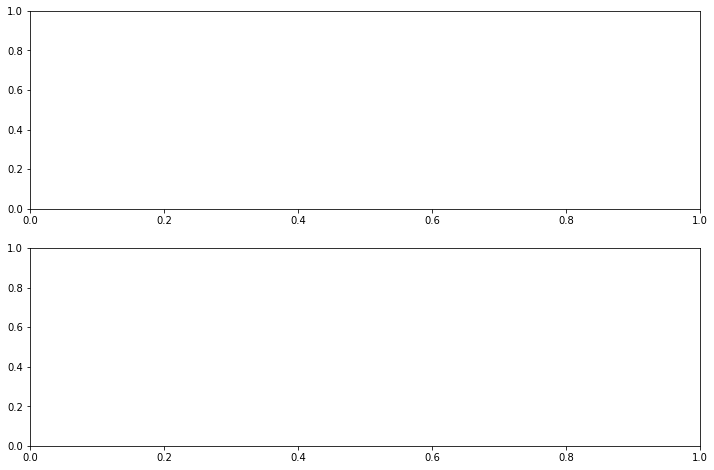

In [13]:
import obspy
from obspy.clients.fdsn import Client
from obspy import read, Stream, UTCDateTime
from obspy import read, read_inventory
import os
#os.environ['PROJ_LIB'] = "/home/userlibs/anaconda/anaconda3_C6/envs/obspyclass/share/proj"
os.environ['PROJ_LIB'] = "/home/userlibs/anaconda3/share/proj"

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (12, 8)

event_time=UTCDateTime("2021-01-11T21:32:59.020000Z")

client_s = Client("IRIS")
# Download station information at the response level!
inv = client_s.get_stations(network="TW", station="TATO", location="", channel="???",
                     starttime=event_time - 10 * 60, endtime=event_time + 30 * 60, level="response")
print(inv)
inv[0].plot()
inv[0].plot_response(0.001)

client_s = Client()
# Download 3 component waveforms.
st = client_s.get_waveforms(network="IU", station="TATO", location="",
                     channel="BH?", starttime=event_time - 10 * 60,
                     endtime=event_time + 30 * 60, attach_response=True) # default=attach_respnse=False

st.plot()

[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


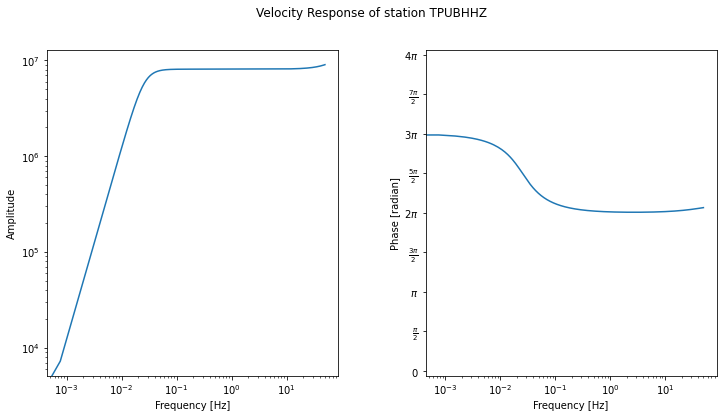

[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


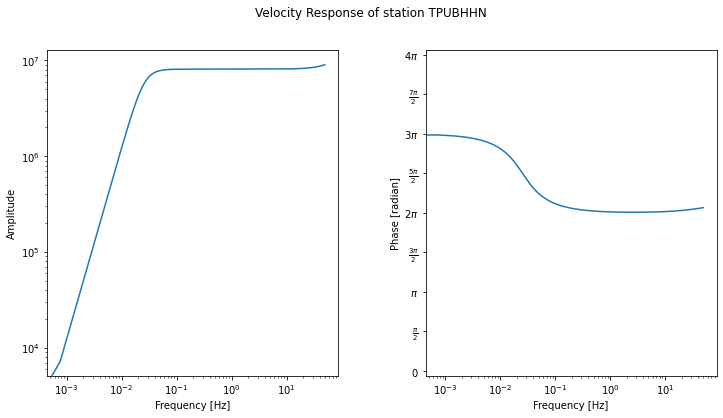

[(-0.11372565405995053+0.11309733552923254j), (-0.11372565405995053-0.11309733552923254j), (-1086.9910581420684+0j), (-1231.5043202071988+1451.4158059584845j), (-1231.5043202071988-1451.4158059584845j), (-4599.291644855457+9116.90188071758j), (-4599.291644855457-9116.90188071758j)] 4.85497e+18


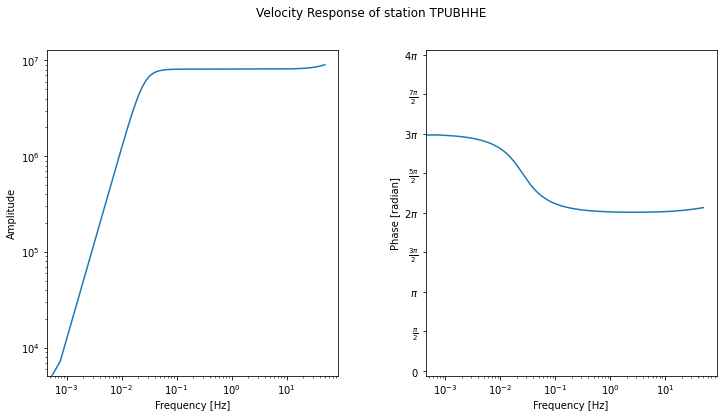

<Figure size 864x432 with 0 Axes>

In [8]:
# convert mseeds file to SAC files and write station and event headers
from obspy.core.event import read_events # obspy event class has a method to read events from a catalogue
from obspy.core.event import Catalog, Event, Origin, Magnitude
from obspy import read, Stream, UTCDateTime
from obspy.io.sac import SACTrace, header
from obspy import read, read_inventory
from obspy import Trace
from obspy.signal.invsim import paz_to_freq_resp
from obspy.io.sac.sacpz import attach_paz
from glob import glob
import obspy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy.geodetics import gps2dist_azimuth, kilometers2degrees
plt.rcParams['figure.figsize'] = 12, 6
stn='TPUB'
plt.figure()
for comp in ["Z", "N", "E"]:
    paz="/home/seismograms/TWseismograms/PZ/TPUB/TPUB.HH%s.IES_BATS.01.20090219_99999999.pz"%(comp)
    tr=Trace()
    attach_paz(tr,paz, tovel=True, torad=True)
    poles=tr.stats.paz['poles']
    zeros=tr.stats.paz['zeros']
    scale_fac=tr.stats.paz['sensitivity'] * tr.stats.paz['gain']
    print(poles, scale_fac)
    h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.01, 131072, freq=True)
    plt.subplot(121)
    plt.loglog(f, abs(h))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    phase = 2 * np.pi + np.unwrap(np.angle(h))
    plt.semilogx(f, phase)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radian]')
# ticks and tick labels at multiples of pi
    plt.yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi, 5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi], 
            ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$', r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$'])
    plt.ylim(-0.2, 4 * np.pi + 0.2)
# title, centered above both subplots
    plt.suptitle("Velocity Response of station " + stn + "HH"+comp)
# make more room in between subplots for the ylabel of right plot
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    png=stn+".HH"+comp+".disp_response_sacpz.png"
    plt.savefig(png)

    
stla=23.3005
stlo=120.6296
stel=370.0
